In [1]:
%matplotlib notebook
from linearmodels import PanelOLS
import pandas as pd

In [2]:
feature_dir = 'data/features/'

In [3]:
df_twitter = pd.read_csv(feature_dir+'twitter_features.csv', parse_dates=['Date'])
df_news = pd.read_csv(feature_dir+'news_features.csv', parse_dates=['Date'])
df_out= pd.read_csv(feature_dir+'stock_features.csv', parse_dates=['Date'])

In [4]:
df = pd.merge(df_out, df_twitter, how='left', on='Date')
df = pd.merge(df, df_news, how='left', on='Date')

In [5]:
df = df.fillna(0)

In [6]:
df

,Date,AAPL_Change,AAPL_Lag 2 Significant,stock_x,GOOG_Change,GOOG_Lag 2 Significant,stock_y,MSFT_Change,MSFT_Lag 2 Significant,stock,...,Trump_sentiment_score,Trump_heuristic_score,New York Times_sentiment_score,New York Times_polar_score,CNN_sentiment_score,CNN_polar_score,Washington Post_sentiment_score,Washington Post_polar_score,NYT_sentiment_score,NYT_polar_score
0,2015-01-02,-0.012675,-1,AAPL,-0.004216,-1,GOOG,-0.001498,0,MSFT,...,0.323554,0.331358,0.0,0.0,-0.176336,-0.1492,0.0,0.0,-0.012855,-0.0970
1,2015-01-05,-0.027830,-1,AAPL,-0.010869,-1,GOOG,-0.006215,0,MSFT,...,0.352101,0.383644,0.0,0.0,-0.281860,-0.8519,0.0,0.0,0.021248,0.0937
2,2015-01-06,-0.016160,1,AAPL,-0.015786,-1,GOOG,0.000216,0,MSFT,...,0.354565,0.295516,0.0,0.0,0.100810,0.1651,0.0,0.0,-0.018193,-0.1756
3,2015-01-07,0.006195,1,AAPL,-0.015534,0,GOOG,-0.008624,1,MSFT,...,0.109130,-0.421761,0.0,0.0,-0.229275,-0.4767,0.0,0.0,-0.045886,0.1026
4,2015-01-08,0.018937,1,AAPL,-0.017771,0,GOOG,0.016746,1,MSFT,...,0.099112,-0.122951,0.0,0.0,-0.360086,-0.7003,0.0,0.0,-0.034352,-0.0730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2019-04-24,0.014333,-1,AAPL,0.010738,0,GOOG,0.013618,1,MSFT,...,0.252729,0.244343,0.0,0.0,0.000000,0.0000,0.0,0.0,-0.050849,-0.1125
1084,2019-04-25,-0.002556,-1,AAPL,0.000514,0,GOOG,0.033945,0,MSFT,...,-0.215995,0.026744,0.0,0.0,0.000000,0.0000,0.0,0.0,-0.028734,0.0418
1085,2019-04-26,-0.009331,0,AAPL,0.003344,-1,GOOG,-0.002768,0,MSFT,...,0.192100,0.323469,0.0,0.0,0.000000,0.0000,0.0,0.0,-0.078153,-0.2229
1086,2019-04-29,-0.002440,1,AAPL,0.003940,-1,GOOG,0.001542,0,MSFT,...,0.354891,0.354788,0.0,0.0,0.000000,0.0000,0.0,0.0,-0.126724,-0.1281


In [7]:
data = df.set_index(['Date'])
data = df.reset_index().set_index(['stock','Date'])
# data = df.reset_index().set_index(['Date'])


In [8]:
data.max()

index                                   1087
AAPL_Change                         0.171182
AAPL_Lag 2 Significant                     1
stock_x                                 AAPL
GOOG_Change                         0.148429
GOOG_Lag 2 Significant                     1
stock_y                                 GOOG
MSFT_Change                         0.100358
MSFT_Lag 2 Significant                     1
BarackObama_sentiment_score           0.8591
BarackObama_heuristic_score           0.8591
cnnbrk_sentiment_score               0.18553
cnnbrk_heuristic_score               0.48194
KimKardashian_sentiment_score         0.9363
KimKardashian_heuristic_score         0.9363
Trump_sentiment_score                  0.922
Trump_heuristic_score                  0.922
New York Times_sentiment_score        0.5106
New York Times_polar_score            1.0212
CNN_sentiment_score                   0.8402
CNN_polar_score                       1.6804
Washington Post_sentiment_score       0.5423
Washington

In [9]:
data

index  AAPL_Change  AAPL_Lag 2 Significant stock_x  \
stock Date                                                             
MSFT  2015-01-02      0    -0.012675                      -1    AAPL   
      2015-01-05      1    -0.027830                      -1    AAPL   
      2015-01-06      2    -0.016160                       1    AAPL   
      2015-01-07      3     0.006195                       1    AAPL   
      2015-01-08      4     0.018937                       1    AAPL   
...                 ...          ...                     ...     ...   
      2019-04-24   1083     0.014333                      -1    AAPL   
      2019-04-25   1084    -0.002556                      -1    AAPL   
      2019-04-26   1085    -0.009331                       0    AAPL   
      2019-04-29   1086    -0.002440                       1    AAPL   
      2019-04-30   1087    -0.006556                       1    AAPL   

                  GOOG_Change  GOOG_Lag 2 Significant stock_y  MSFT_Change  \
stock Date                                                                   
MSFT  2015-01-02    -0.004216                      -1    GOOG    -0.001498   
      2015-01-05    -0.010869                      -1    GOOG    -0.006215   
      2015-01-06    -0.015786                      -1    GOOG     0.000216   
      2015-01-07    -0.015534                       0    GOOG    -0.008624   
      2015-01-08    -0.017771                       0    GOOG     0.016746   
...                       ...                     ...     ...          ...   
      2019-04-24     0.010738                       0    GOOG     0.013618   
      2019-04-25     0.000514                       0    GOOG     0.033945   
      2019-04-26     0.003344                      -1    GOOG    -0.002768   
      2019-04-29     0.003940                      -1    GOOG     0.001542   
      2019-04-30    -0.069859                      -1    GOOG    -0.000693   

                  MSFT_Lag 2 Significant  BarackObama_sentiment_score  ...  \
stock Date                                                             ...   
MSFT  2015-01-02                       0                    -0.107225  ...   
      2015-01-05                       0                     0.610250  ...   
      2015-01-06                       0                     0.160900  ...   
      2015-01-07                       1                     0.469467  ...   
      2015-01-08                       1                     0.370700  ...   
...                                  ...                          ...  ...   
      2019-04-24                       1                     0.000000  ...   
      2019-04-25                       0                     0.000000  ...   
      2019-04-26                       0                     0.000000  ...   
      2019-04-29                       0                     0.000000  ...   
      2019-04-30                      -1                     0.000000  ...   

                  Trump_sentiment_score  Trump_heuristic_score  \
stock Date                                                       
MSFT  2015-01-02               0.323554               0.331358   
      2015-01-05               0.352101               0.383644   
      2015-01-06               0.354565               0.295516   
      2015-01-07               0.109130              -0.421761   
      2015-01-08               0.099112              -0.122951   
...                                 ...                    ...   
      2019-04-24               0.252729               0.244343   
      2019-04-25              -0.215995               0.026744   
      2019-04-26               0.192100               0.323469   
      2019-04-29               0.354891               0.354788   
      2019-04-30               0.060791              -0.033813   

                  New York Times_sentiment_score  New York Times_polar_score  \
stock Date                                                                     
MSFT  2015-01-02                

In [10]:
data_exog = data[['New York Times_sentiment_score','CNN_sentiment_score', 'Washington Post_sentiment_score']]

In [11]:
data_exog

New York Times_sentiment_score  CNN_sentiment_score  \
stock Date                                                              
MSFT  2015-01-02                             0.0            -0.176336   
      2015-01-05                             0.0            -0.281860   
      2015-01-06                             0.0             0.100810   
      2015-01-07                             0.0            -0.229275   
      2015-01-08                             0.0            -0.360086   
...                                          ...                  ...   
      2019-04-24                             0.0             0.000000   
      2019-04-25                             0.0             0.000000   
      2019-04-26                             0.0             0.000000   
      2019-04-29                             0.0             0.000000   
      2019-04-30                             0.0             0.000000   

                  Washington Post_sentiment_score  
stock Date                                         
MSFT  2015-01-02                              0.0  
      2015-01-05                              0.0  
      2015-01-06                              0.0  
      2015-01-07                              0.0  
      2015-01-08                              0.0  
...                                           ...  
      2019-04-24                              0.0  
      2019-04-25                              0.0  
      2019-04-26                              0.0  
      2019-04-29                              0.0  
      2019-04-30                              0.0  

[1088 rows x 3 columns]

In [12]:
data_dependent = data['MSFT_Change']

In [13]:
data_dependent

stock  Date      
MSFT   2015-01-02   -0.001498
       2015-01-05   -0.006215
       2015-01-06    0.000216
       2015-01-07   -0.008624
       2015-01-08    0.016746
                       ...   
       2019-04-24    0.013618
       2019-04-25    0.033945
       2019-04-26   -0.002768
       2019-04-29    0.001542
       2019-04-30   -0.000693
Name: MSFT_Change, Length: 1088, dtype: float64

In [14]:
model = PanelOLS(data['MSFT_Change'],data_exog,entity_effects=True, time_effects=True)
#res = model.fit()
#res

In [15]:
from datetime import datetime

def gen_year_month(row):
    return '{}-{}'.format(row['Date'].year, str(row['Date'].month).zfill(2))
    #return datetime.strptime(string, '%Y-%m')


df_index = pd.read_csv(feature_dir+'index_features.csv', parse_dates=['Date'])
df_index['year-month'] = df_index.apply(gen_year_month, axis=1)
df_index = df_index.set_index(['year-month', 'Date'])
#df_index = df_index.loc['2017-01-01':'2017-02-01']
df_index.columns

Index(['Change VIX', 'Direction VIX', 'Lag 1 Change VIX',
       'Lag 1 Direction VIX', 'Lag 2 Change VIX', 'Lag 2 Direction VIX',
       'Lag 2 Significant VIX', 'Lag 5 Change VIX', 'Lag 5 Direction VIX',
       'Change SPY', 'Direction SPY', 'Lag 1 Change SPY',
       'Lag 1 Direction SPY', 'Lag 2 Change SPY', 'Lag 2 Direction SPY',
       'Lag 2 Significant SPY', 'Lag 5 Change SPY', 'Lag 5 Direction SPY'],
      dtype='object')

In [16]:
df['year-month'] = df.apply(gen_year_month, axis=1)
data = df.reset_index().set_index(['year-month', 'Date'])
#data_exog = data[['New York Times_sentiment_score','CNN_sentiment_score', 'Washington Post_sentiment_score']]
data.columns

Index(['index', 'AAPL_Change', 'AAPL_Lag 2 Significant', 'stock_x',
       'GOOG_Change', 'GOOG_Lag 2 Significant', 'stock_y', 'MSFT_Change',
       'MSFT_Lag 2 Significant', 'stock', 'BarackObama_sentiment_score',
       'BarackObama_heuristic_score', 'cnnbrk_sentiment_score',
       'cnnbrk_heuristic_score', 'KimKardashian_sentiment_score',
       'KimKardashian_heuristic_score', 'Trump_sentiment_score',
       'Trump_heuristic_score', 'New York Times_sentiment_score',
       'New York Times_polar_score', 'CNN_sentiment_score', 'CNN_polar_score',
       'Washington Post_sentiment_score', 'Washington Post_polar_score',
       'NYT_sentiment_score', 'NYT_polar_score'],
      dtype='object')

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt  
import numpy as np
import itertools

yearMonths = sorted(list(set([i[0] for i in data.index.tolist()])))
def genGraph(index, sentiment):
    scores = []
    for ym in yearMonths:
        df = pd.merge(data.loc[ym], df_index.loc[ym], how='left', on='Date')
        scores.append(df.corr().loc[index][sentiment])

    fig, ax = plt.subplots()
    ax.plot(yearMonths, scores)
    ax.set(xlabel='Year-month', ylabel='Correlation')
    ax.grid()
    ax.set_ylim([-1,1])
    plt.xticks(rotation=90)
    plt.xticks(yearMonths[0::3])
    #plt.show()
    name = '{}--{}.png'.format(sentiment.replace(' ', '_'), index.replace(' ', '_'))
    plt.savefig('graphs/{}'.format(name), bbox_inches='tight')
    print("saved {}".format(name))

sentiments = ['BarackObama_sentiment_score', 'BarackObama_heuristic_score', 'cnnbrk_sentiment_score', 'cnnbrk_heuristic_score', 'KimKardashian_sentiment_score', 'KimKardashian_heuristic_score', 'Trump_sentiment_score', 'Trump_heuristic_score', 'New York Times_sentiment_score', 'New York Times_polar_score', 'CNN_sentiment_score', 'CNN_polar_score', 'Washington Post_sentiment_score', 'Washington Post_polar_score', 'NYT_sentiment_score', 'NYT_polar_score']
indices = ['Change VIX', 'Direction VIX', 'Lag 1 Change VIX', 'Lag 1 Direction VIX', 'Lag 2 Change VIX', 'Lag 2 Direction VIX', 'Lag 2 Significant VIX', 'Lag 5 Change VIX', 'Lag 5 Direction VIX', 'Change SPY', 'Direction SPY', 'Lag 1 Change SPY', 'Lag 1 Direction SPY', 'Lag 2 Change SPY', 'Lag 2 Direction SPY', 'Lag 2 Significant SPY', 'Lag 5 Change SPY', 'Lag 5 Direction SPY']
pairs = list(itertools.product(sentiments, indices))
#for pair in pairs:
    #genGraph(pair[1], pair[0])

<IPython.core.display.Javascript object>


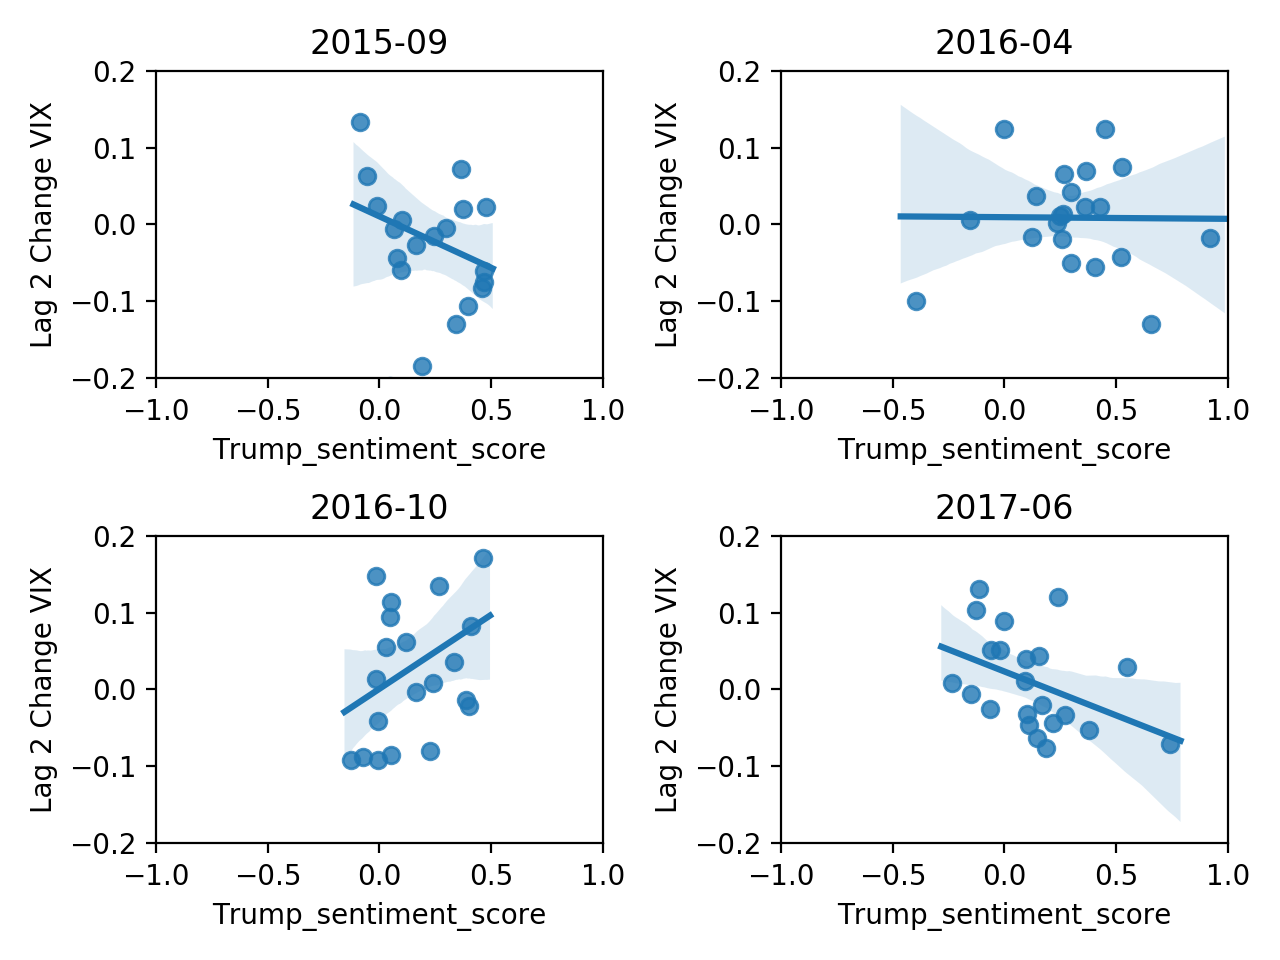

In [42]:
import seaborn as sns

data2 = data.reset_index()
df_index2 = df_index.reset_index()
df = pd.merge(data2, df_index2, how='inner', on=['Date', 'year-month'])
df = df.set_index(['year-month', 'Date'])


#months = ['2015-06', '2015-09', '2015-12', '2016-03']
months = ['2015-09', '2016-04', '2016-10', '2017-06']
#months = ['2015-{}'.format(str(i).zfill(2)) for i in range(1,13)] + ['2016-{}'.format(str(i).zfill(2)) for i in range(1,13)]
#months = yearMonths
fig = plt.figure(1)
for i, month in enumerate(months):
    #fig = plt.figure()
    plt.subplot(2,2,i+1)
    #df.loc[month].plot(ax=plt.gca(), x='Trump_sentiment_score', y='Lag 2 Change VIX', kind='scatter', title=month, xlim=(-1,1), ylim=(-.2,.2))
    #fig.tight_layout()
    #plt.savefig('test/{}.png'.format(i), bbox_inches='tight')
    sns.regplot(df.loc[month]['Trump_sentiment_score'],df.loc[month]['Lag 2 Change VIX']).set_title(month)
    plt.ylim(-.2,.2)
    plt.xlim(-1,1)
    #sns_plot.savefig('test/{}.png'.format(i))
    #plt.savefig('test/{}.png'.format(i), bbox_inches='tight')
    #fig.tight_layout()
fig.tight_layout()

In [40]:
mod = PanelOLS(df_index['Change VIX'], data[['Trump_sentiment_score']], entity_effects=True)
res = mod.fit()
res
vars(mod)

{'dependent': PanelData
                        Change VIX
 year-month Date                  
 2015-01    2015-01-02    0.116279
            2015-01-05    0.080518
            2015-01-06    0.059406
            2015-01-07   -0.008854
            2015-01-08   -0.110174
 ...                           ...
 2019-04    2019-04-24   -0.010269
            2019-04-25    0.060654
            2019-04-26    0.011287
            2019-04-29   -0.029762
            2019-04-30    0.005368
 
 [1088 rows x 1 columns]
 PanelData object, id: 0x172b3a30, 'exog': PanelData
                        Trump_sentiment_score
 year-month Date                             
 2015-01    2015-01-02               0.323554
            2015-01-05               0.352101
            2015-01-06               0.354565
            2015-01-07               0.109130
            2015-01-08               0.099112
 ...                                      ...
 2019-04    2019-04-24               0.252729
            2019-04-25     

<IPython.core.display.Javascript object>


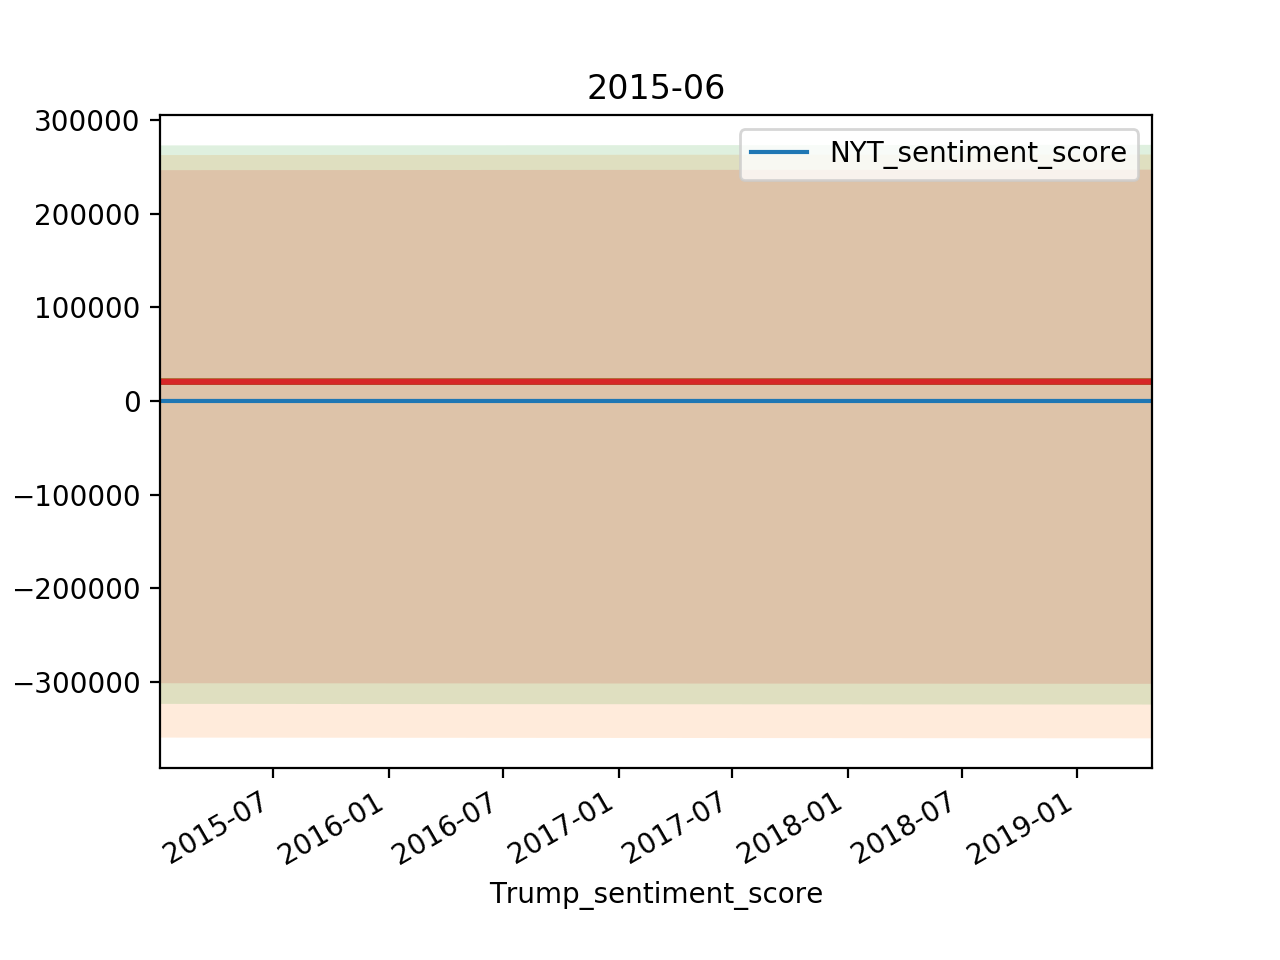

In [20]:
data.reset_index().set_index(['Date']).plot(y='NYT_sentiment_score')